# Kyla Friso

## Research Question

I will answer the question, **"Are shorter or longer films more popular?"** In terms of the dataset, I will be analyzing whether there is any significant correlation between the runtimes and the rankings or sales (domestic, international, and global) of the included films. I will also look into whether runtimes correlate with the genres or distributors of the films, in case these are acting as confounding variables. Before running any analysis, I will ensure that runtimnes are available for all or the majority of the films, and I will manually add data based on my own research where necessary. Once these statistical analyses are complete, I will begin analyzing my results to build hypotheses to explain the patterns or lack there of observed. I plan on looking into studies on human attention span to see if psychological findings support my own results.

In [2]:
# Load Dataset
import pandas as pd
df = pd.read_csv("../data/raw/Highest Holywood Grossing Movies.csv")
df.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


## Exploratory Data Analysis

In [3]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re

### Sales Data 

In [4]:
# Preliminary Analysis
print(df.shape, end='\n\n')
print(df.columns, end='\n\n')
print(df.nunique(axis=0), end='\n\n')
print(df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))))

(918, 11)

Index(['Unnamed: 0', 'Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License'],
      dtype='object')

Unnamed: 0                    918
Title                         918
Movie Info                    918
Distributor                    34
Release Date                  740
Domestic Sales (in $)         918
International Sales (in $)    913
World Sales (in $)            918
Genre                         309
Movie Runtime                 101
License                         4
dtype: int64

       Unnamed: 0 Domestic Sales (in $) International Sales (in $)  \
count  918.000000            918.000000                 918.000000   
mean   458.500000      167746917.938998           230143435.584967   
std    265.148072      104036044.969543           217601104.216553   
min      0.000000       80360843.000000                 260.000000   
25%    229.250000      1

###### Notes: There are only 101 unique 'Movie Runtime' values found for the 918 films described. The 'Movie Runtime' variable is not a numerical value, as its absence in the results for the 'describe()' function demonstrates. This will need to be adjusted.

In [5]:
# Checking for Null Values in Relevant Columns
print(df['Movie Runtime'].isnull().values.any())
print(df['Domestic Sales (in $)'].isnull().values.any())
print(df['International Sales (in $)'].isnull().values.any())
print(df['World Sales (in $)'].isnull().values.any())

False
False
False
False


###### Notes: No null values were found in any of the relevant columns. Therefore, there is no need to remove any rows.

In [6]:
# Converting 'Movie Runtime' from Non-Numerical to Numerical
import re
df['Hours'] = df['Movie Runtime'].str.extract('(\d+)\shr\s\d+\smin', expand=True)
df['Minutes'] = df['Movie Runtime'].str.extract('\d+\shr\s(\d+)\smin', expand=True)
df['Hours'] = pd.to_numeric(df['Hours'])
df['Minutes'] = pd.to_numeric(df['Minutes'])
df['Runtime (Min)'] = (60 * df['Hours']) + df['Minutes']
df.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Hours,Minutes,Runtime (Min)
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,2.0,18.0,138.0
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,3.0,1.0,181.0
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,2.0,42.0,162.0
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,2.0,14.0,134.0
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,2.0,29.0,149.0


###### Notes: Runtime has been converted from a string in the format '_ hr _ min' into a numerical variable describing total minutes.

In [7]:
# Removing Nonessential Columns
df_cleaned = df.drop(columns=['Unnamed: 0', 'Movie Info', 'Distributor', 'Release Date', 
                              'Genre', 'Movie Runtime', 'License', 'Hours','Minutes'])
df_cleaned.head()

,Title,Domestic Sales (in $),International Sales (in $),World Sales (in $),Runtime (Min)
0,Star Wars: Episode VII - The Force Awakens (2015),936662225,1132859475,2069521700,138.0
1,Avengers: Endgame (2019),858373000,1939128328,2797501328,181.0
2,Avatar (2009),760507625,2086738578,2847246203,162.0
3,Black Panther (2018),700426566,647171407,1347597973,134.0
4,Avengers: Infinity War (2018),678815482,1369544272,2048359754,149.0


### Ratings Data

In [60]:
# Loading 'Movie Aggregate Rating Data' Dataset
rank = pd.read_csv("../data/processed/Movie Aggregate Rating Data.csv")
rank.head()

,Title,Imdb,RT(Audience),RT(Critic),Letterboxd,Rateyourmusic,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Star Wars: Episode VII - The Force Awakens (2015),7.8 (936432),85 (100000+),93 (450),3.41 (802884),3.03 (7496),NaN,Mean of RYM ratings,Mean of Imdb Ratings,Mean of,NaN,NaN,NaN
1,Avengers: Endgame (2019),8.4 (1143197),90 (50000+),94 (555),3.92 (1131629),3.25 (5091),NaN,2.728833747,7.16,NaN,NaN,NaN,NaN
2,Avatar (2009),7.9 (1315981),82 (250000+),82 (335),3.53 (814160),2.71 (7624),NaN,Converted to base 10,NaN,NaN,NaN,NaN,NaN
3,Black Panther (2018),7.3 (781423),79 (50000+),96 (530),3.74 (1112607),2.97 (4535),NaN,5.457667494,NaN,NaN,NaN,NaN,NaN
4,Avengers: Infinity War (2018),8.4 (1091599),92 (50000+),85 (489),4.00 (1180128),3.43 (5540),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Preliminary Analysis
print(rank.shape, end='\n\n')
print(rank.columns, end='\n\n')
print(rank.nunique(axis=0), end='\n\n')
print(rank.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))))

(918, 13)

Index(['Title', 'Imdb', 'RT(Audience)', 'RT(Critic)', 'Letterboxd',
       'Rateyourmusic', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

Title            918
Imdb              88
RT(Audience)      24
RT(Critic)        24
Letterboxd        49
Rateyourmusic    238
Unnamed: 6         0
Unnamed: 7         4
Unnamed: 8         2
Unnamed: 9         1
Unnamed: 10        0
Unnamed: 11        0
Unnamed: 12        0
dtype: int64

      Unnamed: 6 Unnamed: 10 Unnamed: 11 Unnamed: 12
count   0.000000    0.000000    0.000000    0.000000
mean         nan         nan         nan         nan
std          nan         nan         nan         nan
min          nan         nan         nan         nan
25%          nan         nan         nan         nan
50%          nan         nan         nan         nan
75%          nan         nan         nan         nan
max          nan         nan         nan         nan


In [62]:
# Isolating Rankings
rank['Imdb Unstandardized'] = rank['Imdb'].str.extract('(\d+\.*\d*)\s\(\d+\+*\)', expand=True)
rank['RT(Audience) Unstandardized'] = rank['RT(Audience)'].str.extract('(\d+\.*\d*)\s\(\d+\+*\)', expand=True)
rank['RT(Critic) Unstandardized'] = rank['RT(Critic)'].str.extract('(\d+\.*\d*)\s\(\d+\+*\)', expand=True)
rank['Letterboxd Unstandardized'] = rank['Letterboxd'].str.extract('(\d+\.*\d*)\s\(\d+\+*\)', expand=True)
rank['Rateyourmusic Unstandardized'] = rank['Rateyourmusic'].str.extract('(\d+\.*\d*)\s\(\d+\+*\)', expand=True)
rank.head()

,Title,Imdb,RT(Audience),RT(Critic),Letterboxd,Rateyourmusic,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Imdb Unstandardized,RT(Audience) Unstandardized,RT(Critic) Unstandardized,Letterboxd Unstandardized,Rateyourmusic Unstandardized
0,Star Wars: Episode VII - The Force Awakens (2015),7.8 (936432),85 (100000+),93 (450),3.41 (802884),3.03 (7496),NaN,Mean of RYM ratings,Mean of Imdb Ratings,Mean of,NaN,NaN,NaN,7.8,85,93,3.41,3.03
1,Avengers: Endgame (2019),8.4 (1143197),90 (50000+),94 (555),3.92 (1131629),3.25 (5091),NaN,2.728833747,7.16,NaN,NaN,NaN,NaN,8.4,90,94,3.92,3.25
2,Avatar (2009),7.9 (1315981),82 (250000+),82 (335),3.53 (814160),2.71 (7624),NaN,Converted to base 10,NaN,NaN,NaN,NaN,NaN,7.9,82,82,3.53,2.71
3,Black Panther (2018),7.3 (781423),79 (50000+),96 (530),3.74 (1112607),2.97 (4535),NaN,5.457667494,NaN,NaN,NaN,NaN,NaN,7.3,79,96,3.74,2.97
4,Avengers: Infinity War (2018),8.4 (1091599),92 (50000+),85 (489),4.00 (1180128),3.43 (5540),NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4,92,85,4.00,3.43


###### Notes: Some of the ratings are formated to include the number of contributions to the average rating in parentheses, following the rating. These have been converted to numerical columns containing only the rating.

In [63]:
# Standardizing Rankings
rank = rank.apply(pd.to_numeric, errors = 'ignore')
rank['Imdb Standardized'] = (rank['Imdb Unstandardized']/10)*100
rank['RT(Audience) Standardized'] = rank['RT(Audience) Unstandardized']
rank['RT(Critic) Standardized'] = rank['RT(Critic) Unstandardized']
rank['Letterboxd Standardized'] = (rank['Letterboxd Unstandardized']/5)*100
rank['Rateyourmusic Standardized'] = (rank['Rateyourmusic Unstandardized']/5)*100
rank.head()

,Title,Imdb,RT(Audience),RT(Critic),Letterboxd,Rateyourmusic,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Imdb Unstandardized,RT(Audience) Unstandardized,RT(Critic) Unstandardized,Letterboxd Unstandardized,Rateyourmusic Unstandardized,Imdb Standardized,RT(Audience) Standardized,RT(Critic) Standardized,Letterboxd Standardized,Rateyourmusic Standardized
0,Star Wars: Episode VII - The Force Awakens (2015),7.8 (936432),85 (100000+),93 (450),3.41 (802884),3.03 (7496),NaN,Mean of RYM ratings,Mean of Imdb Ratings,Mean of,...,7.8,85.0,93.0,3.41,3.03,78.0,85.0,93.0,68.2,60.6
1,Avengers: Endgame (2019),8.4 (1143197),90 (50000+),94 (555),3.92 (1131629),3.25 (5091),NaN,2.728833747,7.16,NaN,...,8.4,90.0,94.0,3.92,3.25,84.0,90.0,94.0,78.4,65.0
2,Avatar (2009),7.9 (1315981),82 (250000+),82 (335),3.53 (814160),2.71 (7624),NaN,Converted to base 10,NaN,NaN,...,7.9,82.0,82.0,3.53,2.71,79.0,82.0,82.0,70.6,54.2
3,Black Panther (2018),7.3 (781423),79 (50000+),96 (530),3.74 (1112607),2.97 (4535),NaN,5.457667494,NaN,NaN,...,7.3,79.0,96.0,3.74,2.97,73.0,79.0,96.0,74.8,59.4
4,Avengers: Infinity War (2018),8.4 (1091599),92 (50000+),85 (489),4.00 (1180128),3.43 (5540),NaN,NaN,NaN,NaN,...,8.4,92.0,85.0,4.00,3.43,84.0,92.0,85.0,80.0,68.6


###### Notes: Rankings were standardized by dividing the given ranking by the maximum ranking offered by the site's scoring system. This quotient was then multiplied by 100 to give a standardized percentage ranking. The maximum ranking for each site's scoring system are as follows: Imdb - 10, RT - 100, Letterboxd - 5, Rateyourmusic - 5. RT rankings did not require standardization since they are already presented as scores out of 100%.

In [64]:
# Removing Nonessential Columns
rank = rank.drop(columns=['Imdb', 'RT(Audience)', 'RT(Critic)', 'Letterboxd',
                          'Rateyourmusic', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 
                          'Unnamed: 9','Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12','Imdb Unstandardized', 
                          'RT(Audience) Unstandardized','RT(Critic) Unstandardized',
                          'Letterboxd Unstandardized', 'Rateyourmusic Unstandardized'])

In [65]:
# Checking for Null Values in Relevant Columns
print(rank['Imdb Standardized'].isnull().values.any())
print(rank['RT(Audience) Standardized'].isnull().values.any())
print(rank['RT(Critic) Standardized'].isnull().values.any())
print(rank['Letterboxd Standardized'].isnull().values.any())
print(rank['Rateyourmusic Standardized'].isnull().values.any())

True
True
True
True
True


In [66]:
# Removing Rows with Null Values
rank_cleaned = rank.dropna()
rank_cleaned.head()

,Title,Imdb Standardized,RT(Audience) Standardized,RT(Critic) Standardized,Letterboxd Standardized,Rateyourmusic Standardized
0,Star Wars: Episode VII - The Force Awakens (2015),78.0,85.0,93.0,68.2,60.6
1,Avengers: Endgame (2019),84.0,90.0,94.0,78.4,65.0
2,Avatar (2009),79.0,82.0,82.0,70.6,54.2
3,Black Panther (2018),73.0,79.0,96.0,74.8,59.4
4,Avengers: Infinity War (2018),84.0,92.0,85.0,80.0,68.6


###### Notes: Currently, the dataset on ratings is uncomplete, and there is a very limited number of rows with all columns filled. Thus, this initial analysis using the current dataset will provide limited insight into correlations between runtime and ratings.

In [69]:
# Adding Average Rating
rank_cleaned['Average Rating'] = (rank_cleaned['Imdb Standardized'] + rank_cleaned['Letterboxd Standardized'] + rank_cleaned['Rateyourmusic Standardized']
                                  + rank_cleaned['RT(Audience) Standardized'] + rank_cleaned['RT(Critic) Standardized'])/5
rank_cleaned.head()

/var/folders/gh/lskmt33s5hl6qxw5zrrd8d140000gn/T/ipykernel_51671/3192762130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_cleaned['Average Rating'] = (rank_cleaned['Imdb Standardized'] + rank_cleaned['Letterboxd Standardized'] + rank_cleaned['Rateyourmusic Standardized']


,Title,Imdb Standardized,RT(Audience) Standardized,RT(Critic) Standardized,Letterboxd Standardized,Rateyourmusic Standardized,Average Rating
0,Star Wars: Episode VII - The Force Awakens (2015),78.0,85.0,93.0,68.2,60.6,76.96
1,Avengers: Endgame (2019),84.0,90.0,94.0,78.4,65.0,82.28
2,Avatar (2009),79.0,82.0,82.0,70.6,54.2,73.56
3,Black Panther (2018),73.0,79.0,96.0,74.8,59.4,76.44
4,Avengers: Infinity War (2018),84.0,92.0,85.0,80.0,68.6,81.92


### Combined Data

In [70]:
comb = pd.merge(
    df_cleaned,
    rank_cleaned,
    how="outer",
    on='Title',
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=False,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)
comb

,Title,Domestic Sales (in $),International Sales (in $),World Sales (in $),Runtime (Min),Imdb Standardized,RT(Audience) Standardized,RT(Critic) Standardized,Letterboxd Standardized,Rateyourmusic Standardized,Average Rating
0,Star Wars: Episode VII - The Force Awakens (2015),936662225,1132859475,2069521700,138.0,78.0,85.0,93.0,68.2,60.6,76.96
1,Avengers: Endgame (2019),858373000,1939128328,2797501328,181.0,84.0,90.0,94.0,78.4,65.0,82.28
2,Avatar (2009),760507625,2086738578,2847246203,162.0,79.0,82.0,82.0,70.6,54.2,73.56
3,Black Panther (2018),700426566,647171407,1347597973,134.0,73.0,79.0,96.0,74.8,59.4,76.44
4,Avengers: Infinity War (2018),678815482,1369544272,2048359754,149.0,84.0,92.0,85.0,80.0,68.6,81.92
...,...,...,...,...,...,...,...,...,...,...,...
913,The Notebook (2004),81001787,36813370,117815157,123.0,NaN,NaN,NaN,NaN,NaN,NaN
914,Jimmy Neutron: Boy Genius (2001),80936232,22056304,102992536,82.0,NaN,NaN,NaN,NaN,NaN,NaN
915,Eat Pray Love (2010),80574010,124020006,204594016,133.0,NaN,NaN,NaN,NaN,NaN,NaN
916,The Texas Chainsaw Massacre (2003),80571655,26792250,107363905,98.0,NaN,NaN,NaN,NaN,NaN,NaN


### Graphs

<Axes: xlabel='Runtime (Min)', ylabel='Domestic Sales (in $)'>

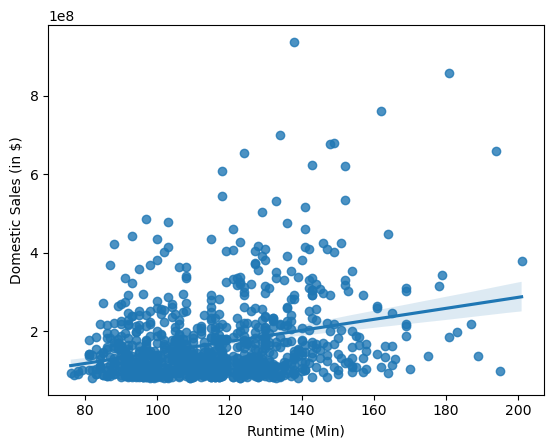

In [55]:
# Runtime vs. Domestic Sales
sns.regplot(data=comb,
            x='Runtime (Min)',
            y='Domestic Sales (in $)')

<Axes: xlabel='Runtime (Min)', ylabel='International Sales (in $)'>

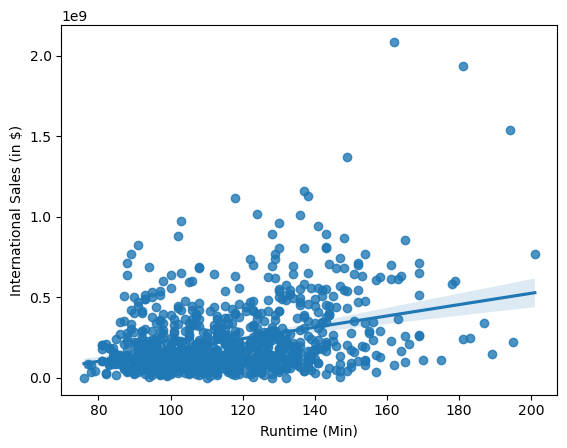

In [56]:
# Runtime vs. International Sales
sns.regplot(data=comb,
            x='Runtime (Min)',
            y='International Sales (in $)')

<Axes: xlabel='Runtime (Min)', ylabel='World Sales (in $)'>

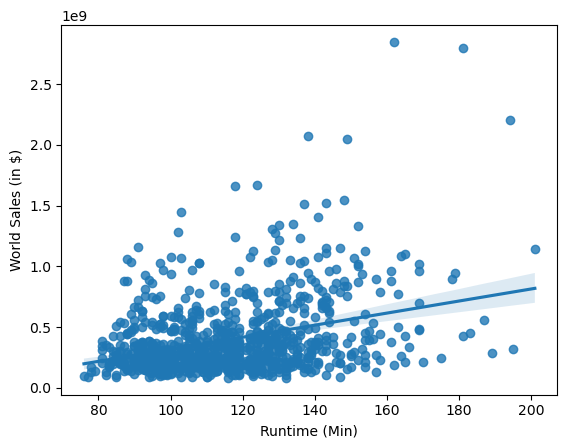

In [57]:
# Runtime vs. World Sales
sns.regplot(data=comb,
            x='Runtime (Min)',
            y='World Sales (in $)')

<Axes: xlabel='Runtime (Min)', ylabel='Average Rating'>

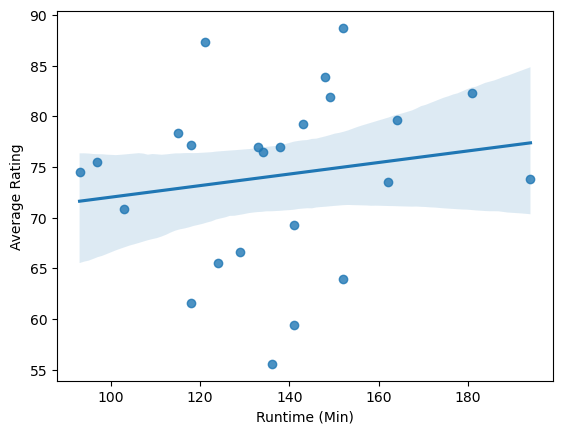

In [72]:
# Runtime vs. Average Rating
sns.regplot(data=comb,
               x='Runtime (Min)',
               y='Average Rating')

## Refining Research Question